# Module 2 - Error Assesment and Intro to Numpy

## Goals

* Wrap up our discussion of using recurring sums to calculate basic quantities
* Introduction to other types of recursive methods
* Basic error assesment
* Dive into NumPy

### Computing $\pi$
We can use a recursive algorithm with a finite sum just as we did for computing $e^x$. There are two well known formulas for this:

**Leibniz accelerated summation**

\begin{equation}
\pi = 4 \sum_{n=1}^\infty \frac{(-1)^{n+1}}{2n-1}
\end{equation}

**Sharp summation**

\begin{equation}
\pi = \sum_{n=0}^\infty \frac{2(-1)^{n}3^{1/2-n}}{2n+1}
\end{equation}


In [1]:
def leibniz(N):
    '''Compute pi via an accelerated Leibniz summation.'''    # String text shown when using help(function)
    lpi = 0.0
    for n in range(1,N):
        if (n % 2):
            sign = 1
        else:
            sign = -1
        lpi += 1.0*sign/(2*n-1)
    return 4.0*lpi

def sharp(N):
    '''Compute pi via the Sharp summation.'''
    spi = 0.0
    for n in range(N):
        if (n % 2):
            sign = -1
        else:
            sign = 1
        num = 2*sign*3**(0.5-n)
        denom = 2*n+1
        spi += num/denom
    return spi

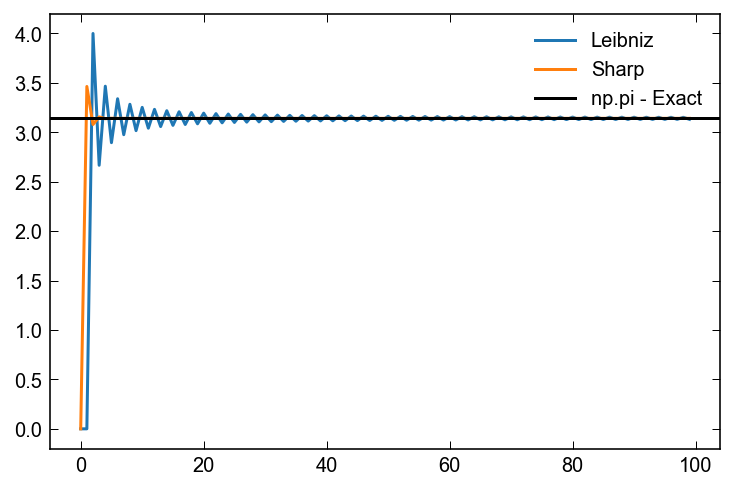

In [2]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

terms = 100
N = np.arange(terms)             
lpi = np.zeros(terms)
spi = np.zeros(terms)

for n in N:
    lpi[n] = leibniz(n)
    spi[n] = sharp(n)

plt.figure()
plt.plot(N, lpi, label = 'Leibniz')
plt.plot(N, spi, label = 'Sharp')
plt.axhline(y=np.pi, color='k', label = 'np.pi - Exact')
plt.legend()

## Another way to compute $\pi$ - throwing stones in a pond


We can compute $\pi$ by calculating the area of a circle of radius $r = 1$, $A = \pi r^2 = \pi$. How can we obtain the area of a circle using basic python commands?

### Monte Carlo method

We can find the area of any shape using random numbers. First, we enclose the shape of our object of interest inside another shape of known area. For a circle of radius 1 we can use a square with sides of length 2. We then create points with randomly generated coordinates within the space of the enclosing shape (our square in this case). The ratio of the number of points that land inside the circle, $N_{\text{circle}}$, with respect to the total number of points generated, $N_{\text{total}}$, is proportional to the ratio of the area of the circle with respect to the total enclosing area:

\begin{equation}
    \frac{N_{\text{circle}}}{N_{\text{total}}} = \frac{A_{\text{circle}}}{A_{\text{total}}} \Rightarrow A_{\text{circle}} = \frac{N_{\text{circle}}}{N_{\text{total}}} A_{\text{total}}
\end{equation}

<img src="http://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif" width="200px">

In [3]:
def monte_carlo(N):
    '''Compute pi via Monte Carlo.'''
    
    inCircle = 0.0 # counts how many points land inside the circle

    for n in range(N):
        # Generate points with random coordinates inside a box of side length = 2 and centered at the origin
        x = 2.0*np.random.random() - 1.0 # np.random.random() generates numbers within the interval 0.0 and 1.0
        y = 2.0*np.random.random() - 1.0
        r = np.sqrt(x**2 + y**2)         
        if r <= 1.0:
            inCircle += 1.0             # if the point lands inside the circle, then r <= 1.0

    mcpi = 4.0*inCircle/N
    return mcpi

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


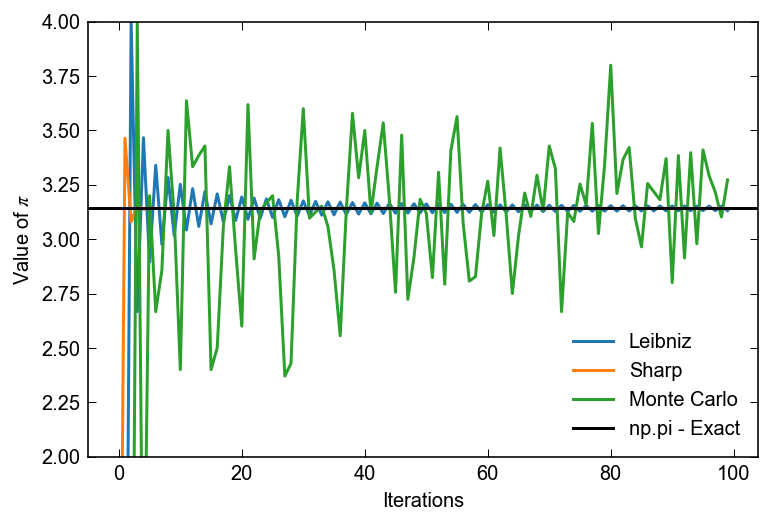

In [4]:
import numpy as np
from matplotlib import pylab as plt
terms = 100
N = np.arange(terms)             
lpi = np.zeros(terms)
spi = np.zeros(terms)
mpi = np.zeros(terms)

for n in N:
    lpi[n] = leibniz(n)
    spi[n] = sharp(n)
    mpi[n] = monte_carlo(n)

plt.figure()
plt.plot(N, lpi, label = 'Leibniz')
plt.plot(N, spi, label = 'Sharp')
plt.plot(N, mpi, label = 'Monte Carlo')
plt.axhline(y=np.pi, color='k', label = 'np.pi - Exact')
plt.ylim((2.0,4.0))
plt.xlabel('Iterations')
plt.ylabel(r'Value of $\pi$')
plt.legend()

## Basic error assessment

How do we assess if our recurring algorithms have approach a satisfactory value?

1. Check error with respect to a known quantity

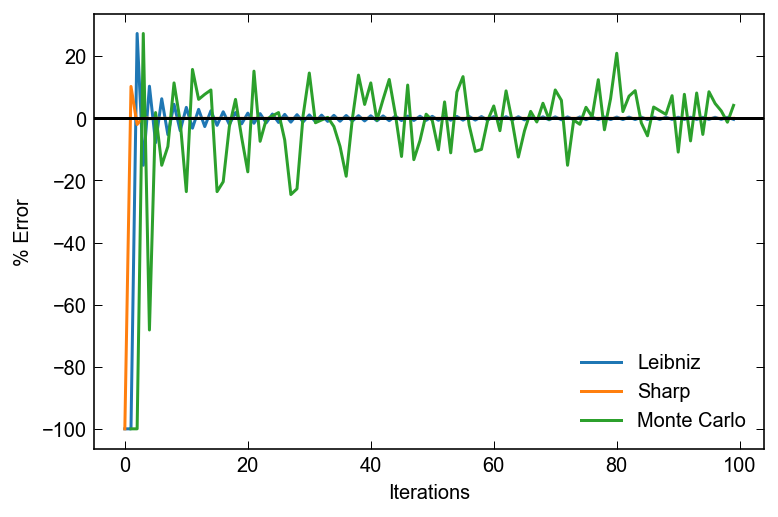

In [5]:
plt.figure()
plt.plot(N, 100*(lpi - np.pi)/np.pi, label = 'Leibniz')
plt.plot(N, 100*(spi - np.pi)/np.pi, label = 'Sharp')
plt.plot(N, 100*(mpi - np.pi)/np.pi, label = 'Monte Carlo')
plt.axhline(y=0, color='k')
plt.xlabel('Iterations')
plt.ylabel('% Error')
plt.legend()

2. Check convergence of algorithm as number of terms increases
\begin{equation}
    \epsilon(n) = \left| \frac{f(n)-f(n-1)}{f(n)} \right|
\end{equation}

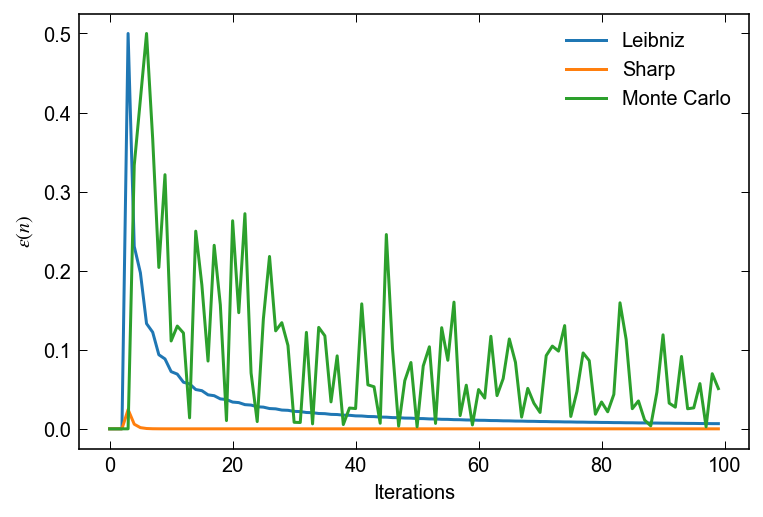

In [6]:
start = 3
terms = 100
N = np.arange(terms)             
lpi_eps = np.zeros(terms)
spi_eps = np.zeros(terms)
mpi_eps = np.zeros(terms)

for n in range(start, terms):
    lpi_eps[n] = np.abs((leibniz(n) - leibniz(n-1))/leibniz(n))
    spi_eps[n] = np.abs((sharp(n) - sharp(n-1))/sharp(n))
    mpi_eps[n] = np.abs((monte_carlo(n) - monte_carlo(n-1))/monte_carlo(n))

plt.figure()
plt.plot(N, lpi_eps, label = 'Leibniz')
plt.plot(N, spi_eps, label = 'Sharp')
plt.plot(N, mpi_eps, label = 'Monte Carlo')
plt.xlabel('Iterations')
plt.ylabel(r'$\epsilon(n)$')
plt.legend()

## Dive into NumPy

NumPy is a very powerful numerical package for python that provides the following:

* **Optimized N-dimensional arrays (not limited to just numbers)**
    * Creation of arrays from data (lists or tuples) or prefilled arrays
    * Advanced indexing and selection
    * Array manipulation (e.g., resize, sort, transpose, etc...)
    * Basic array calculations (e.g., min, max, sum, mean, var, etc...)

In [7]:
x = np.array((0,2,4,5,5,8,10,20)) # create a Numpy array from a list of numbers
y = np.array(((0.4,3.6,1.1,25.6),(7.5,2.5,6.78,10.0))) # create a Numpy array from a list of numbers
z = np.zeros(10)
zz = np.ones((5,10))

In [8]:
print('Properties of x')
print(x)                          # all values in the array
print(type(x))                    # python type
print(x.dtype)                    # ndarray data type
print(len(x))                     # length of the array
print(x.shape)                    # shape of the array

print('\nProperties of y')
print(y)                          # all values in the array
print(type(y))                    # python type
print(y.dtype)                    # ndarray data type
print(len(y))                     # length of the array
print(y.shape)                    # shape of the array

print('\nProperties of z')
print(z)                          # all values in the array
print(type(z))                    # python type
print(z.dtype)                    # ndarray data type
print(len(z))                     # length of the array
print(z.shape)                    # shape of the array

print('\nProperties of zz')
print(zz)                          # all values in the array
print(type(zz))                    # python type
print(zz.dtype)                    # ndarray data type
print(len(zz))                     # length of the array
print(zz.shape)                    # shape of the array

Properties of x
[ 0  2  4  5  5  8 10 20]
<class 'numpy.ndarray'>
int64
8
(8,)

Properties of y
[[  0.4    3.6    1.1   25.6 ]
 [  7.5    2.5    6.78  10.  ]]
<class 'numpy.ndarray'>
float64
2
(2, 4)

Properties of z
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
<class 'numpy.ndarray'>
float64
10
(10,)

Properties of zz
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
<class 'numpy.ndarray'>
float64
5
(5, 10)


In [9]:
print("Indexing and slicing 1D array x")
print(x[0])                       # element 0 in the array

x[0] = 1                          # set element 0 to a new value
print(x[0])    

x[0] = 1.7                        # ndarray type is integer, so numpy will use FLOOR(value) if it is a float
print(x[0])

# Array slicing - The basic slice syntax is i:j:k where i is the starting index, j is the stopping index,
# and k is the step

# Negative i and j are interpreted as n + i and n + j where n is the number of elements in the corresponding
# dimension. Negative k makes stepping go towards smaller indices.


print(x[:])                       # all elements in the array
print(x[1:5])                     # elements 1-4 (end index is non-inclusive)
print(x[:-1])                     # all elements up the second to last one
print(x[::2])                     # every other element in the array starting at 0th element

print("\nIndexing and slicing 2D array y")
print(y[:])                       # all elements in the array
print(y[:,0])                     # all rows for column 0
print(y[:,1:])                    # all rows for columns 1 to last

Indexing and slicing 1D array x
0
1
1
[ 1  2  4  5  5  8 10 20]
[2 4 5 5]
[ 1  2  4  5  5  8 10]
[ 1  4  5 10]

Indexing and slicing 2D array y
[[  0.4    3.6    1.1   25.6 ]
 [  7.5    2.5    6.78  10.  ]]
[ 0.4  7.5]
[[  3.6    1.1   25.6 ]
 [  2.5    6.78  10.  ]]


In [10]:
x = x.reshape((2,4))
print(x.shape)
y = y.transpose()
print(y.shape)
y = y.flatten()
print(y.shape)
y = y.reshape((2,4))
print(y.shape)

(2, 4)
(4, 2)
(8,)
(2, 4)


In [11]:
print(y.mean())                   # mean of all values in the flattened array
print(np.mean(y))                 # same as above
print(y[:5].mean())               # use only the first 4 elements (or rows if 2D) to calculate the mean
print(y.min())

7.185
7.185
7.185
0.4


In [12]:
x *= 10                           # element by element scaling by a factor
print(x)
y -= 5                            # element by element subtraction
print(y)
a = x*y                           # element by element multiplication - arrays must have the same size
print(a)

[[ 10  20  40  50]
 [ 50  80 100 200]]
[[ -4.6    2.5   -1.4   -2.5 ]
 [ -3.9    1.78  20.6    5.  ]]
[[  -46.     50.    -56.   -125. ]
 [ -195.    142.4  2060.   1000. ]]


* **Optimized mathematical functions (e.g., exp, log, sin, etc...)**
    * Numpy functions work on scalars as well as numpy arrays

In [13]:
print(np.sin(0.5))                 # sine of a scalar quantity
print(np.sin(y))                   # element by element calculation of sine

0.479425538604
[[ 0.993691    0.59847214 -0.98544973 -0.59847214]
 [ 0.68776616  0.97819661  0.98390669 -0.95892427]]


* **Linear algebra**
    * Matrix and vector products
    * Norms
    * Decompositions
    * Eigenvalues and solving equations

In [14]:
x = np.array((0,0,1.0))
y = np.array((0,1.0,1.0))
z = np.dot(x,y)
print(z)

1.0


* **Basic input and output of simple text and binary files**

In [15]:
x = np.random.rand(10)
np.savetxt('file.txt', x)
y = np.loadtxt('file.txt')
print(y)
help(np.loadtxt)
help(np.savetxt)

[ 0.62984363  0.94096464  0.91124998  0.92090226  0.93728466  0.66247564
  0.22205863  0.4173143   0.46929637  0.35696117]
Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must mat

* **Fourier transforms**
* **Random sampling (random number generator and distributions)**
* **Basic statistics**

### Numpy help

* Jupyter notebook `Help->NumPy` (takes you to https://docs.scipy.org/doc/numpy/reference)
* NumPy User Guide - https://docs.scipy.org/doc/numpy/user/index.html
* NumPy Quickstart Tutorial - https://docs.scipy.org/doc/numpy/user/quickstart.html